In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk as nltk
import string
from pathlib import Path
import os
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\D\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\D\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [71]:
from time import time
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans 

In [72]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(15, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [73]:
#https://medium.com/@dennisndungu68/text-classification-using-k-means-33bea24e4a94
#http://brandonrose.org/clustering

In [74]:
#creating instances of stemmers and lemmatizers
stemmer_ps = PorterStemmer()
stemmer_ss = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()

# Load data

In [75]:
#f = open("/Users/brandon/Documents/UCL/COMP0087/CW2/bds_1.txt", "r")
#f_lines = f.readlines()
#f.close()

In [76]:
#company_ids = f_lines[0::2]
#company_descriptions = f_lines[1::2]

In [77]:
my_path = Path('/Users/D/Documents/CSML/NLP-COMP0087/CW2/SP500')
os.chdir(my_path)
fns = os.listdir(my_path)

ticker_sp50 = []
sector_sp50 = []
bds_sp50 = []
for fn in fns:
    fn_first = fn.split('.txt')[0]
    ticker = fn_first.split('_')[0]
    sector = fn_first.split('_')[1]
    f = open(fn, 'r', encoding="utf8")
    f_text = f.read()
    f.close()
    
    ticker_sp50.append(ticker)
    sector_sp50.append(sector)
    bds_sp50.append(f_text)
    
company_ids = ticker_sp50
company_descriptions = bds_sp50

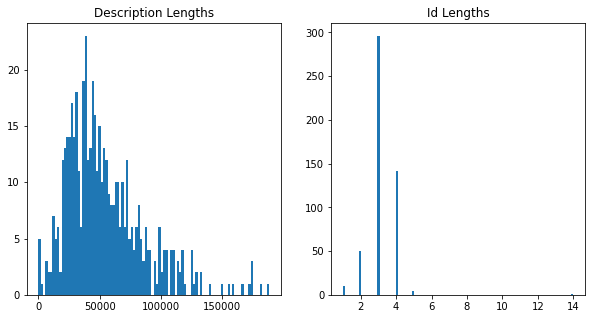

In [78]:
len_descriptions = [len(x) for x in company_descriptions]
plt.figure(figsize=[10, 5])
plt.subplot(1, 2, 1)
plt.hist(len_descriptions, bins=100);
plt.title('Description Lengths');

plt.subplot(1, 2, 2)
plt.hist([len(x) for x in company_ids], bins=100);
plt.title('Id Lengths');

In [79]:
valid_descriptions = np.array(len_descriptions) > 3000
n_samples = np.sum(valid_descriptions)
n_samples

498

In [80]:
company_ids = np.array(company_ids)[valid_descriptions]
company_descriptions = [x for x in company_descriptions if len(x) > 3000]

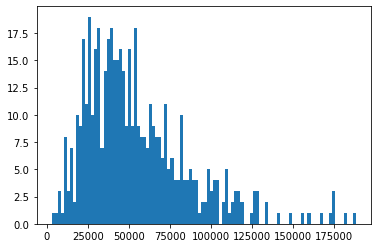

In [81]:
some_lengths = [len(x) for x in company_descriptions if len(x) < 5e5]
plt.hist(some_lengths, bins=100);

In [82]:
print(company_ids[0])
print(len(company_ids),len(company_descriptions))
company_descriptions[0]

AAL
498 498


'Overview\nAmerican Airlines Group Inc. (AAG), a Delaware corporation, is a holding company and its principal, wholly-owned subsidiaries are American Airlines, Inc. (American), Envoy Aviation Group Inc. (Envoy), PSA Airlines, Inc. (PSA) and Piedmont Airlines, Inc. (Piedmont). AAG was formed in 1982 under the name AMR Corporation (AMR) as the parent company of American, which was founded in 1934. \nAAG’s and American’s principal executive offices are located at 1 Skyview Drive, Fort Worth, Texas 76155 and their telephone number is 817-963-1234.\nAirline Operations\nTogether with our wholly-owned regional airline subsidiaries and third-party regional carriers operating as American Eagle, our primary business activity is the operation of a major network air carrier, providing scheduled air transportation for passengers and cargo through our hubs in Charlotte, Chicago, Dallas/Fort Worth, Los Angeles, Miami, New York, Philadelphia, Phoenix and Washington, D.C. and partner gateways, includin

# Text Pre-processing

## Stemming

In [83]:
# Takes out stop words and also stems each word using snowball stemmer
t0 = time()
stemmed_text = []
for i in range(len(company_descriptions)): #CHANGE THIS
    print(i)
    stemmed_array = company_descriptions[i].split()
    stemmed = [stemmer_ss.stem(word) for word in stemmed_array if not word in set(stopwords.words('english'))]
    stemmed = ' '.join(stemmed)
    stemmed_text.append(stemmed)

print(stemmed_text[0])
print("done in %fs" % (time() - t0))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [84]:
# Removing punctuation
stemmed_text2 = stemmed_text[:]
for i in range(len(stemmed_text2)):
    for k in string.punctuation:
        stemmed_text2[i] = stemmed_text2[i].replace(k, '')

## Lemmatizing

In [85]:
# Takes out stop words and also lemmatizes each word
t0 = time()
lemmad_text = []
for i in range(len(company_descriptions)): #CHANGE THIS
    print(i)
    lemmad_array = company_descriptions[i].split()
    lemmad = [lemmatizer.lemmatize(word) for word in lemmad_array if not word in set(stopwords.words('english'))]
    lemmad = ' '.join(lemmad)
    lemmad_text.append(lemmad)

print(lemmad_text[0])
print("done in %fs" % (time() - t0))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [86]:
print(stemmed_text[0])

overview american airlin group inc. (aag), delawar corporation, hold compani principal, wholly-own subsidiari american airlines, inc. (american), envoy aviat group inc. (envoy), psa airlines, inc. (psa) piedmont airlines, inc. (piedmont). aag form 1982 name amr corpor (amr) parent compani american, found 1934. aag american princip execut offic locat 1 skyview drive, fort worth, texa 76155 telephon number 817-963-1234. airlin oper togeth wholly-own region airlin subsidiari third-parti region carrier oper american eagle, primari busi activ oper major network air carrier, provid schedul air transport passeng cargo hub charlotte, chicago, dallas/fort worth, los angeles, miami, new york, philadelphia, phoenix washington, d.c. partner gateways, includ london, madrid, seattle/tacoma, sydney tokyo (among others). approxim 95 million passeng board flight 2020, decreas approxim 215 million passeng 2019. dure 2020, experienc unpreced declin demand air travel due impact coronavirus (covid-19). cov

In [87]:
print(stemmed_text2[0])

overview american airlin group inc aag delawar corporation hold compani principal whollyown subsidiari american airlines inc american envoy aviat group inc envoy psa airlines inc psa piedmont airlines inc piedmont aag form 1982 name amr corpor amr parent compani american found 1934 aag american princip execut offic locat 1 skyview drive fort worth texa 76155 telephon number 8179631234 airlin oper togeth whollyown region airlin subsidiari thirdparti region carrier oper american eagle primari busi activ oper major network air carrier provid schedul air transport passeng cargo hub charlotte chicago dallasfort worth los angeles miami new york philadelphia phoenix washington dc partner gateways includ london madrid seattletacoma sydney tokyo among others approxim 95 million passeng board flight 2020 decreas approxim 215 million passeng 2019 dure 2020 experienc unpreced declin demand air travel due impact coronavirus covid19 covid19 declar global health pandem world health organ surfac near 

In [88]:
print(lemmad_text[0])

Overview American Airlines Group Inc. (AAG), Delaware corporation, holding company principal, wholly-owned subsidiary American Airlines, Inc. (American), Envoy Aviation Group Inc. (Envoy), PSA Airlines, Inc. (PSA) Piedmont Airlines, Inc. (Piedmont). AAG formed 1982 name AMR Corporation (AMR) parent company American, founded 1934. AAG’s American’s principal executive office located 1 Skyview Drive, Fort Worth, Texas 76155 telephone number 817-963-1234. Airline Operations Together wholly-owned regional airline subsidiary third-party regional carrier operating American Eagle, primary business activity operation major network air carrier, providing scheduled air transportation passenger cargo hub Charlotte, Chicago, Dallas/Fort Worth, Los Angeles, Miami, New York, Philadelphia, Phoenix Washington, D.C. partner gateways, including London, Madrid, Seattle/Tacoma, Sydney Tokyo (among others). Approximately 95 million passenger boarded flight 2020, decrease approximately 215 million passenger 

# Feature Extraction

In [89]:
# Raw count
cv_raw = CountVectorizer(stop_words='english')
X_raw = cv_raw.fit_transform(company_descriptions)

cv_stem = CountVectorizer()
X_stemmed = cv_stem.fit_transform(stemmed_text)

cv_stem2 = CountVectorizer()
X_stemmed2 = cv_stem2.fit_transform(stemmed_text2)

cv_lem = CountVectorizer()
X_lemmad = cv_lem.fit_transform(lemmad_text)

# Tfidf 
# vec = TfidfVectorizer()
# X = vec.fit_transform(lemmad_text)
# X.shape

In [90]:
print(X_raw.shape)
print(X_stemmed.shape)
print(X_stemmed2.shape)
print(X_lemmad.shape)

(498, 44829)
(498, 44379)
(498, 64786)
(498, 44731)


## K-Means Raw text

Initialization complete
Iteration 0, inertia 40470382.0.
Iteration 1, inertia 33603604.00401578.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 48100828.0.
Iteration 1, inertia 33603604.00401578.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 49956138.0.
Iteration 1, inertia 33603604.00401578.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 43001214.0.
Iteration 1, inertia 33603604.00401578.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 46316420.0.
Iteration 1, inertia 33603604.00401578.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 77846540.0.
Iteration 1, inertia 33603604.00401578.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 50669854.0.
Iteration 1, inertia 33603604.00401578.
Converged at iteration 1: strict convergence.

Initialization complete
Iteration 0, inertia 37414316.0
Iteration 1, inertia 31108649.899817288
Iteration 2, inertia 30331189.903143305
Iteration 3, inertia 29993919.36543276
Iteration 4, inertia 29888215.78265612
Iteration 5, inertia 29868603.02874458
Iteration 6, inertia 29865801.80494501
Iteration 7, inertia 29864280.926466547
Iteration 8, inertia 29860768.468196653
Iteration 9, inertia 29856721.943178125
Iteration 10, inertia 29853126.352229744
Iteration 11, inertia 29851914.414262164
Iteration 12, inertia 29850527.88205203
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 39767524.0
Iteration 1, inertia 30893024.923413943
Iteration 2, inertia 29782854.004026145
Iteration 3, inertia 29425891.684792046
Iteration 4, inertia 29301368.30436082
Iteration 5, inertia 29270014.53260691
Iteration 6, inertia 29237757.168987565
Iteration 7, inertia 29210520.98998272
Iteration 8, inertia 29186053.97931196
Iteration 9, inertia 29129104.154022925
Iterati

Iteration 0, inertia 37509140.0
Iteration 1, inertia 29185977.186114606
Iteration 2, inertia 28318282.98807849
Iteration 3, inertia 28165753.799343847
Iteration 4, inertia 28053741.41191337
Iteration 5, inertia 28038742.301582064
Iteration 6, inertia 28028572.71956936
Iteration 7, inertia 28019437.558567468
Iteration 8, inertia 28011489.37217245
Iteration 9, inertia 28006775.285454065
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 39140120.0
Iteration 1, inertia 29195018.13096941
Iteration 2, inertia 28631679.372569736
Iteration 3, inertia 28310005.025556624
Iteration 4, inertia 28225364.549834255
Iteration 5, inertia 28187705.899933
Iteration 6, inertia 28156592.98721948
Iteration 7, inertia 28150604.96425513
Iteration 8, inertia 28146910.20458971
Iteration 9, inertia 28141305.206829436
Iteration 10, inertia 28134868.442941897
Iteration 11, inertia 28132188.796072014
Converged at iteration 11: strict convergence.
Initialization complete
Iter

Initialization complete
Iteration 0, inertia 36035475.0
Iteration 1, inertia 28228399.0951708
Iteration 2, inertia 27823551.18896998
Iteration 3, inertia 27398986.66158009
Iteration 4, inertia 27027057.0267965
Iteration 5, inertia 26819876.260120716
Iteration 6, inertia 26703852.818915356
Iteration 7, inertia 26560494.321573958
Iteration 8, inertia 26465396.788933117
Iteration 9, inertia 26438487.22647018
Iteration 10, inertia 26413148.069534976
Iteration 11, inertia 26383286.795464452
Iteration 12, inertia 26367632.727894343
Iteration 13, inertia 26363889.959141176
Iteration 14, inertia 26363150.757846378
Converged at iteration 14: strict convergence.
Initialization complete
Iteration 0, inertia 38302362.0
Iteration 1, inertia 28496688.47607597
Iteration 2, inertia 27392778.45815726
Iteration 3, inertia 27085287.78481538
Iteration 4, inertia 26993255.9772176
Iteration 5, inertia 26926445.883088294
Iteration 6, inertia 26808516.36658078
Iteration 7, inertia 26715961.844663605
Iteration

Iteration 0, inertia 33648420.0
Iteration 1, inertia 25568350.160682682
Iteration 2, inertia 25022840.337941386
Iteration 3, inertia 24817113.70062223
Iteration 4, inertia 24776444.78782018
Iteration 5, inertia 24764264.94039093
Iteration 6, inertia 24759253.071785882
Iteration 7, inertia 24758446.246844113
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 33935970.0
Iteration 1, inertia 26232010.908428248
Iteration 2, inertia 25564784.99292648
Iteration 3, inertia 25223558.056459464
Iteration 4, inertia 25074008.86911929
Iteration 5, inertia 24961332.601478126
Iteration 6, inertia 24909058.011518255
Iteration 7, inertia 24904663.255367015
Iteration 8, inertia 24903800.785020705
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 34980106.0
Iteration 1, inertia 25932018.11634974
Iteration 2, inertia 25694486.718000457
Iteration 3, inertia 25594549.70674307
Iteration 4, inertia 25577295.995366976
Iteration 5

Iteration 4, inertia 24058399.880420003
Iteration 5, inertia 24044583.85279912
Iteration 6, inertia 24037959.544653844
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 33650985.0
Iteration 1, inertia 26154894.861832663
Iteration 2, inertia 25569921.908069756
Iteration 3, inertia 25048021.49135423
Iteration 4, inertia 24925111.983742125
Iteration 5, inertia 24887173.279018223
Iteration 6, inertia 24875932.550620463
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 33906664.0
Iteration 1, inertia 24309582.438774932
Iteration 2, inertia 24103876.773850642
Iteration 3, inertia 24070507.16301421
Iteration 4, inertia 24066081.620430376
Iteration 5, inertia 24062448.945345085
Iteration 6, inertia 24051163.325022873
Iteration 7, inertia 24049049.40666362
Iteration 8, inertia 24043236.656261142
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 32739150.0
Iteration 1, inert

Initialization complete
Iteration 0, inertia 33021025.0
Iteration 1, inertia 24451887.448852144
Iteration 2, inertia 24193089.507606458
Iteration 3, inertia 24081035.36429223
Iteration 4, inertia 24040089.202957075
Iteration 5, inertia 24018497.967406675
Iteration 6, inertia 24015494.223439693
Iteration 7, inertia 24010177.912939027
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 33043206.0
Iteration 1, inertia 24384254.31841668
Iteration 2, inertia 23873496.23384816
Iteration 3, inertia 23743868.76040807
Iteration 4, inertia 23694928.84880521
Iteration 5, inertia 23683686.03253936
Iteration 6, inertia 23678526.637867626
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 32308067.0
Iteration 1, inertia 24661258.18991964
Iteration 2, inertia 24117435.764607973
Iteration 3, inertia 23999314.407990932
Iteration 4, inertia 23978942.50648711
Iteration 5, inertia 23966490.62650902
Iteration 6, inertia 23950297

Initialization complete
Iteration 0, inertia 32713972.0
Iteration 1, inertia 23945656.676711913
Iteration 2, inertia 23511720.573509227
Iteration 3, inertia 23357616.18329393
Iteration 4, inertia 23225947.92395282
Iteration 5, inertia 23129582.349673126
Iteration 6, inertia 23083920.752131388
Iteration 7, inertia 23071474.0811267
Iteration 8, inertia 23064116.222589914
Iteration 9, inertia 23054969.92166917
Iteration 10, inertia 23050797.841389265
Iteration 11, inertia 23049507.316126265
Iteration 12, inertia 23049156.62620776
Iteration 13, inertia 23048572.48435214
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 32178815.0
Iteration 1, inertia 23655625.68425166
Iteration 2, inertia 23236993.626082327
Iteration 3, inertia 23023021.260695413
Iteration 4, inertia 22833679.25979239
Iteration 5, inertia 22664266.139399935
Iteration 6, inertia 22626271.502888672
Iteration 7, inertia 22615226.05011249
Iteration 8, inertia 22613413.161674876
Iterati

Initialization complete
Iteration 0, inertia 30802417.0
Iteration 1, inertia 23499958.61202038
Iteration 2, inertia 22938812.68826178
Iteration 3, inertia 22754278.938503895
Iteration 4, inertia 22613141.151078276
Iteration 5, inertia 22563983.482830834
Iteration 6, inertia 22535524.580878302
Iteration 7, inertia 22497981.827133145
Iteration 8, inertia 22497184.16451021
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 31356576.0
Iteration 1, inertia 23754066.367590092
Iteration 2, inertia 22931909.88770383
Iteration 3, inertia 22656385.148527343
Iteration 4, inertia 22468994.14088558
Iteration 5, inertia 22325853.014437012
Iteration 6, inertia 22251886.973705046
Iteration 7, inertia 22230022.214819904
Iteration 8, inertia 22219547.226569735
Iteration 9, inertia 22214947.824141957
Iteration 10, inertia 22203193.627169847
Iteration 11, inertia 22201303.922278203
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, i

Initialization complete
Iteration 0, inertia 30615711.0
Iteration 1, inertia 22791603.78135532
Iteration 2, inertia 22459625.65335529
Iteration 3, inertia 22309788.9832806
Iteration 4, inertia 22245916.948015988
Iteration 5, inertia 22178045.91731077
Iteration 6, inertia 22133385.490501244
Iteration 7, inertia 22108199.819751862
Iteration 8, inertia 22078850.497204363
Iteration 9, inertia 22041039.70211906
Iteration 10, inertia 22010608.36096636
Iteration 11, inertia 22000777.672613047
Iteration 12, inertia 21971774.8800857
Iteration 13, inertia 21921015.018222496
Iteration 14, inertia 21867373.496055424
Iteration 15, inertia 21860674.035065003
Iteration 16, inertia 21854556.726423144
Iteration 17, inertia 21852939.09530024
Iteration 18, inertia 21852274.27607032
Iteration 19, inertia 21851440.99284576
Iteration 20, inertia 21850596.793901607
Iteration 21, inertia 21849121.864308674
Iteration 22, inertia 21845120.07221223
Iteration 23, inertia 21837365.502216425
Iteration 24, inertia 2

Initialization complete
Iteration 0, inertia 30469349.0
Iteration 1, inertia 22347461.877987374
Iteration 2, inertia 21797623.47442871
Iteration 3, inertia 21703109.428782832
Iteration 4, inertia 21686747.334445395
Iteration 5, inertia 21676051.378715895
Iteration 6, inertia 21672989.95142777
Iteration 7, inertia 21663549.100892663
Iteration 8, inertia 21655571.622934
Iteration 9, inertia 21650490.050091814
Iteration 10, inertia 21646009.635155685
Iteration 11, inertia 21639892.334598776
Iteration 12, inertia 21635560.569882594
Iteration 13, inertia 21634086.96359203
Iteration 14, inertia 21632562.190715156
Converged at iteration 14: strict convergence.
Initialization complete
Iteration 0, inertia 29501991.0
Iteration 1, inertia 21696395.58010277
Iteration 2, inertia 21284125.43477966
Iteration 3, inertia 21208586.262497846
Iteration 4, inertia 21183594.919655066
Iteration 5, inertia 21140099.32566206
Iteration 6, inertia 21111416.0458427
Converged at iteration 6: strict convergence.
I

Iteration 13, inertia 21390061.478491884
Iteration 14, inertia 21386622.758060526
Iteration 15, inertia 21385305.826737083
Iteration 16, inertia 21384744.09792813
Converged at iteration 16: strict convergence.


<function matplotlib.pyplot.show(close=None, block=None)>

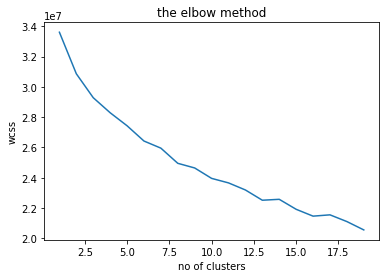

In [91]:
wcss_raw = [] #CHANGE
for i in range(1, 20): #max of 20 clusters otherwise might take too long
    kmeans_raw = KMeans(n_clusters = i, init='k-means++', max_iter = 300, n_init = 10, random_state = 0, verbose = True)
    kmeans_raw.fit(X_raw) #CHANGE
    wcss_raw.append(kmeans_raw.inertia_) #CHANGE
    
#Visualisation of inertia (how far away the points within a cluster are, want small inertia)
plt.plot(range(1,20),wcss_raw[0:20]) #CHANGE
plt.title('the elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show

In [92]:
#applying K-means based on above elbow method, can change true_k to the desired number of clusters
true_k = 10
model_raw = KMeans(n_clusters=true_k, init='k-means++', n_init=1)
model_raw.fit(X_raw) #CHANGE

#Print results
print("top terms for cluster:")
order_centroids_raw = model_raw.cluster_centers_.argsort()[:, ::-1] #sort cluster centers by proximity to centroid
terms_raw = cv_raw.get_feature_names() #CHANGE
for i in range(true_k):
    print("cluster %d:" % i),
    for ind in order_centroids_raw[i, :10]: #selects top terms
        print(' %s' % terms_raw[ind]),
    print
    
print("\n")

top terms for cluster:
cluster 0:
 gas
 energy
 natural
 2020
 electric
 power
 customers
 company
 generation
 service
cluster 1:
 health
 company
 care
 services
 pharmacy
 medicare
 plans
 products
 state
 laws
cluster 2:
 pnc
 capital
 bank
 financial
 federal
 reserve
 risk
 banking
 2020
 regulatory
cluster 3:
 services
 business
 including
 products
 data
 customers
 financial
 2020
 solutions
 company
cluster 4:
 products
 product
 fda
 including
 development
 clinical
 2020
 patients
 drug
 treatment
cluster 5:
 products
 company
 business
 2020
 including
 customers
 services
 operations
 employees
 sales
cluster 6:
 health
 care
 services
 medicare
 including
 company
 business
 healthcare
 federal
 state
cluster 7:
 capital
 bank
 financial
 federal
 risk
 banking
 including
 company
 certain
 requirements
cluster 8:
 capital
 citi
 2020
 net
 total
 31
 credit
 risk
 revenues
 assets
cluster 9:
 insurance
 company
 business
 products
 financial
 risk
 2020
 including
 life

## Stemmed

Initialization complete
Iteration 0, inertia 49406029.0.
Iteration 1, inertia 39721759.351405025.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 56764749.0.
Iteration 1, inertia 39721759.351405025.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 55486235.0.
Iteration 1, inertia 39721759.351405025.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 52258449.0.
Iteration 1, inertia 39721759.351405025.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 54465045.0.
Iteration 1, inertia 39721759.351405025.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 87894951.0.
Iteration 1, inertia 39721759.351405025.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 59845443.0.
Iteration 1, inertia 39721759.351405025.
Converged at iteration 1: strict conve

Iteration 9, inertia 33917597.817142814
Iteration 10, inertia 33900345.225600414
Iteration 11, inertia 33880268.501015335
Iteration 12, inertia 33868875.265531555
Iteration 13, inertia 33866831.17802806
Iteration 14, inertia 33865979.55545511
Iteration 15, inertia 33865476.74149262
Converged at iteration 15: strict convergence.
Initialization complete
Iteration 0, inertia 45724515.0
Iteration 1, inertia 34353692.792263426
Iteration 2, inertia 34076349.736321
Iteration 3, inertia 34003850.649262704
Iteration 4, inertia 33981535.84381593
Iteration 5, inertia 33969170.8524971
Iteration 6, inertia 33966419.030885436
Iteration 7, inertia 33965869.214349575
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 48495490.0
Iteration 1, inertia 35114893.15169058
Iteration 2, inertia 34791902.35454015
Iteration 3, inertia 34742248.22493913
Iteration 4, inertia 34731679.85149235
Iteration 5, inertia 34720682.163989246
Iteration 6, inertia 34718735.594154276
Co

Iteration 2, inertia 32817510.71891432
Iteration 3, inertia 32711006.600364435
Iteration 4, inertia 32695078.437847033
Iteration 5, inertia 32686389.66269506
Iteration 6, inertia 32674591.139700446
Iteration 7, inertia 32671339.84406453
Iteration 8, inertia 32670985.65628728
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 45389691.0
Iteration 1, inertia 33363706.76185897
Iteration 2, inertia 32609470.964067224
Iteration 3, inertia 32150143.881946344
Iteration 4, inertia 31743320.056777127
Iteration 5, inertia 31477094.506337054
Iteration 6, inertia 31420678.575446144
Iteration 7, inertia 31399598.234013364
Iteration 8, inertia 31392273.714112733
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 45511346.0
Iteration 1, inertia 32716014.34737282
Iteration 2, inertia 31920225.464026682
Iteration 3, inertia 31780147.83349556
Iteration 4, inertia 31705968.376826502
Iteration 5, inertia 31641104.87888152
Iter

Initialization complete
Iteration 0, inertia 41334837.0
Iteration 1, inertia 31220455.356198825
Iteration 2, inertia 30497164.06094955
Iteration 3, inertia 30169989.62661824
Iteration 4, inertia 30065342.99130584
Iteration 5, inertia 29984949.003402192
Iteration 6, inertia 29969175.269441787
Iteration 7, inertia 29967141.30841224
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 42212586.0
Iteration 1, inertia 31308630.775325503
Iteration 2, inertia 30536306.36184831
Iteration 3, inertia 30282077.565861873
Iteration 4, inertia 30083928.967680022
Iteration 5, inertia 29946030.233491186
Iteration 6, inertia 29849801.409521997
Iteration 7, inertia 29744379.42582154
Iteration 8, inertia 29648962.773511607
Iteration 9, inertia 29504188.679843243
Iteration 10, inertia 29462350.782373242
Iteration 11, inertia 29380280.723076172
Iteration 12, inertia 29290749.400666337
Iteration 13, inertia 29255593.57308714
Iteration 14, inertia 29229226.880721264
Iter

Initialization complete
Iteration 0, inertia 41982346.0
Iteration 1, inertia 31511292.713404354
Iteration 2, inertia 30617576.45093321
Iteration 3, inertia 30221051.538418297
Iteration 4, inertia 29904720.730119783
Iteration 5, inertia 29847505.82810684
Iteration 6, inertia 29825919.299570702
Iteration 7, inertia 29801153.895701215
Iteration 8, inertia 29787890.746599574
Iteration 9, inertia 29774694.740308106
Iteration 10, inertia 29765990.866839875
Iteration 11, inertia 29761398.881410368
Iteration 12, inertia 29760700.442419548
Iteration 13, inertia 29759650.900663514
Iteration 14, inertia 29758472.19310928
Iteration 15, inertia 29757278.21736234
Converged at iteration 15: strict convergence.
Initialization complete
Iteration 0, inertia 43853049.0
Iteration 1, inertia 30003992.763757236
Iteration 2, inertia 29286683.828703187
Iteration 3, inertia 29078066.611966427
Iteration 4, inertia 28921490.887434844
Iteration 5, inertia 28887648.65501142
Iteration 6, inertia 28879332.67724485
I

Iteration 0, inertia 39637698.0
Iteration 1, inertia 28936159.382053584
Iteration 2, inertia 28442923.982963353
Iteration 3, inertia 28333831.845456664
Iteration 4, inertia 28268984.67438145
Iteration 5, inertia 28082621.58001463
Iteration 6, inertia 27883719.311207533
Iteration 7, inertia 27882581.844527535
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 39925800.0
Iteration 1, inertia 29271736.051859774
Iteration 2, inertia 28641858.212970793
Iteration 3, inertia 28263256.450739253
Iteration 4, inertia 28000613.69998923
Iteration 5, inertia 27876186.940696094
Iteration 6, inertia 27796592.54615107
Iteration 7, inertia 27760434.230225842
Iteration 8, inertia 27733681.62574163
Iteration 9, inertia 27722563.112752214
Iteration 10, inertia 27719192.840492353
Iteration 11, inertia 27713797.035864834
Iteration 12, inertia 27699908.47095404
Iteration 13, inertia 27694456.88020152
Converged at iteration 13: strict convergence.
Initialization complet

Initialization complete
Iteration 0, inertia 39525405.0
Iteration 1, inertia 28723001.515436444
Iteration 2, inertia 27835349.675579093
Iteration 3, inertia 27715816.02829565
Iteration 4, inertia 27655781.810037833
Iteration 5, inertia 27637177.527045313
Iteration 6, inertia 27621609.122801047
Iteration 7, inertia 27605175.686566792
Iteration 8, inertia 27577795.297617964
Iteration 9, inertia 27562649.46473454
Iteration 10, inertia 27558436.920314148
Iteration 11, inertia 27553712.98153017
Iteration 12, inertia 27550455.85816664
Iteration 13, inertia 27545466.23652268
Iteration 14, inertia 27544773.3353282
Iteration 15, inertia 27543606.765089363
Iteration 16, inertia 27543103.02773107
Iteration 17, inertia 27542682.303449266
Converged at iteration 17: strict convergence.
Initialization complete
Iteration 0, inertia 38201982.0
Iteration 1, inertia 27991499.923797015
Iteration 2, inertia 27676610.12429389
Iteration 3, inertia 27584784.25677579
Iteration 4, inertia 27504858.921320964
Ite

Initialization complete
Iteration 0, inertia 38207915.0
Iteration 1, inertia 27856064.479266144
Iteration 2, inertia 27160504.525929537
Iteration 3, inertia 26944186.716246054
Iteration 4, inertia 26853530.739685703
Iteration 5, inertia 26814212.909694444
Iteration 6, inertia 26758136.262597576
Iteration 7, inertia 26680626.295489866
Iteration 8, inertia 26571223.2726578
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 36860827.0
Iteration 1, inertia 27207022.458974976
Iteration 2, inertia 26731956.941533912
Iteration 3, inertia 26599766.7603852
Iteration 4, inertia 26501439.829237293
Iteration 5, inertia 26453115.482331887
Iteration 6, inertia 26387141.83051066
Iteration 7, inertia 26315534.93384685
Iteration 8, inertia 26256496.843419734
Iteration 9, inertia 26223616.469825704
Iteration 10, inertia 26199542.93134797
Iteration 11, inertia 26188695.378021292
Iteration 12, inertia 26188401.384062488
Converged at iteration 12: strict convergence.

Iteration 17, inertia 25760229.433313902
Iteration 18, inertia 25709055.7502394
Iteration 19, inertia 25666643.256191317
Iteration 20, inertia 25644521.250182543
Iteration 21, inertia 25642620.59559098
Iteration 22, inertia 25641676.24715804
Iteration 23, inertia 25638966.62997915
Iteration 24, inertia 25633690.28022024
Iteration 25, inertia 25623557.394641466
Iteration 26, inertia 25621770.0363032
Iteration 27, inertia 25619329.926728636
Converged at iteration 27: strict convergence.
Initialization complete
Iteration 0, inertia 38341680.0
Iteration 1, inertia 27075432.27498191
Iteration 2, inertia 26440027.80667158
Iteration 3, inertia 26288790.446740925
Iteration 4, inertia 26214767.51762307
Iteration 5, inertia 26171122.653506946
Iteration 6, inertia 25842645.698227014
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 37118440.0
Iteration 1, inertia 26156716.779792428
Iteration 2, inertia 25818954.367005914
Iteration 3, inertia 25581633.21045

Initialization complete
Iteration 0, inertia 37036674.0
Iteration 1, inertia 26918714.67929298
Iteration 2, inertia 26354702.730073873
Iteration 3, inertia 26114301.154575452
Iteration 4, inertia 25920182.646576177
Iteration 5, inertia 25860904.533263072
Iteration 6, inertia 25621242.280580863
Iteration 7, inertia 25571245.71402322
Iteration 8, inertia 25552694.469546035
Iteration 9, inertia 25552276.14273516
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 36176294.0
Iteration 1, inertia 26419883.70501965
Iteration 2, inertia 25981852.502723094
Iteration 3, inertia 25779447.637194484
Iteration 4, inertia 25656437.41432149
Iteration 5, inertia 25635835.027737077
Iteration 6, inertia 25600421.457816083
Iteration 7, inertia 25583584.639533218
Iteration 8, inertia 25581385.801608343
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 35771583.0
Iteration 1, inertia 25497049.59967342
Iteration 2, inertia 24940

Initialization complete
Iteration 0, inertia 35058978.0
Iteration 1, inertia 24855077.664504994
Iteration 2, inertia 24442790.53041995
Iteration 3, inertia 24302302.867753185
Iteration 4, inertia 24244069.138199497
Iteration 5, inertia 24231268.212954994
Iteration 6, inertia 24222877.976575494
Iteration 7, inertia 24212689.003027935
Iteration 8, inertia 24196207.682983313
Iteration 9, inertia 24187018.36571144
Iteration 10, inertia 24178767.18648736
Iteration 11, inertia 24175783.236826915
Iteration 12, inertia 24175529.833665088
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 34871891.0
Iteration 1, inertia 25304631.36141487
Iteration 2, inertia 24779983.820602376
Iteration 3, inertia 24534274.19700952
Iteration 4, inertia 24443793.763681177
Iteration 5, inertia 24392981.46419738
Iteration 6, inertia 24372511.085534185
Iteration 7, inertia 24356124.323991653
Iteration 8, inertia 24325259.41241879
Iteration 9, inertia 24306140.066165343
Itera

Initialization complete
Iteration 0, inertia 34003519.0
Iteration 1, inertia 24611331.25393916
Iteration 2, inertia 23927669.40778586
Iteration 3, inertia 23756099.992703814
Iteration 4, inertia 23703682.13746965
Iteration 5, inertia 23700404.93837987
Iteration 6, inertia 23700178.863329545
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 33949986.0
Iteration 1, inertia 24563544.69097292
Iteration 2, inertia 24012057.120133452
Iteration 3, inertia 23698991.252344698
Iteration 4, inertia 23616408.27424337
Iteration 5, inertia 23549523.24834107
Iteration 6, inertia 23516168.952684987
Iteration 7, inertia 23491884.74037402
Iteration 8, inertia 23455917.440971673
Iteration 9, inertia 23430892.472894438
Iteration 10, inertia 23430142.799028654
Iteration 11, inertia 23428078.515577335
Iteration 12, inertia 23426364.933428116
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 34981966.0
Iteration 1, inertia 247

<function matplotlib.pyplot.show(close=None, block=None)>

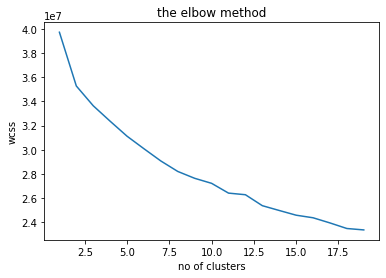

In [93]:
wcss_stemmed = [] #CHANGE
for i in range(1, 20): #max of 20 clusters otherwise might take too long
    kmeans_stem = KMeans(n_clusters = i, init='k-means++', max_iter = 300, n_init = 10, random_state = 0, verbose = True)
    kmeans_stem.fit(X_stemmed) #CHANGE
    wcss_stemmed.append(kmeans_stem.inertia_) #CHANGE
    
#Visualisation of inertia (how far away the points within a cluster are, want small inertia)
plt.plot(range(1,20),wcss_stemmed[0:20]) #CHANGE
plt.title('the elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show

In [94]:
#applying K-means based on above elbow method, can change true_k to the desired number of clusters
true_k = 10
model_stem = KMeans(n_clusters=true_k, init='k-means++', n_init=1)
model_stem.fit(X_stemmed) #CHANGE

#Print results
print("top terms for cluster:")
order_centroids_stem = model_stem.cluster_centers_.argsort()[:, ::-1]
terms_stem = cv_stem.get_feature_names()
for i in range(true_k):
    print("cluster %d:" % i),
    for ind in order_centroids_stem[i, :10]: #selects top terms
        print(' %s' % terms_stem[ind]),
    print
    
print("\n")

top terms for cluster:
cluster 0:
 health
 care
 provid
 state
 compani
 servic
 the
 includ
 program
 plan
cluster 1:
 we
 product
 includ
 the
 our
 oper
 provid
 servic
 in
 custom
cluster 2:
 insur
 compani
 the
 includ
 product
 financi
 invest
 busi
 regul
 manag
cluster 3:
 we
 the
 product
 includ
 compani
 oper
 2020
 busi
 our
 custom
cluster 4:
 product
 the
 includ
 may
 we
 in
 market
 develop
 patient
 fda
cluster 5:
 insur
 compani
 the
 loss
 risk
 busi
 includ
 reinsur
 market
 claim
cluster 6:
 2020
 credit
 capit
 31
 decemb
 loan
 interest
 citi
 total
 includ
cluster 7:
 bank
 capit
 the
 financi
 requir
 includ
 risk
 feder
 regul
 compani
cluster 8:
 the
 gas
 energi
 electr
 oper
 generat
 power
 2020
 natur
 includ
cluster 9:
 servic
 the
 includ
 provid
 we
 market
 data
 network
 in
 busi




## Stemmed and removed punctuation

Initialization complete
Iteration 0, inertia 47839356.0.
Iteration 1, inertia 38489794.42168611.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 55108740.0.
Iteration 1, inertia 38489794.42168611.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 53967776.0.
Iteration 1, inertia 38489794.42168611.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 50732076.0.
Iteration 1, inertia 38489794.42168611.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 52672642.0.
Iteration 1, inertia 38489794.42168611.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 84530190.0.
Iteration 1, inertia 38489794.42168611.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 57605324.0.
Iteration 1, inertia 38489794.42168611.
Converged at iteration 1: strict convergence.

Iteration 0, inertia 44017421.0
Iteration 1, inertia 33527902.693707626
Iteration 2, inertia 33147584.57863301
Iteration 3, inertia 32884269.154396202
Iteration 4, inertia 32862901.28363738
Iteration 5, inertia 32861480.697845336
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 47404989.0
Iteration 1, inertia 34066473.67361384
Iteration 2, inertia 33330252.969301656
Iteration 3, inertia 32960478.64510365
Iteration 4, inertia 32847142.285586704
Iteration 5, inertia 32771365.182337917
Iteration 6, inertia 32719981.939638484
Iteration 7, inertia 32711985.118352324
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 45198202.0
Iteration 1, inertia 33556035.218829535
Iteration 2, inertia 33151024.108008116
Iteration 3, inertia 33052464.563295867
Iteration 4, inertia 33004571.035990648
Iteration 5, inertia 32901080.139943462
Iteration 6, inertia 32828522.435407735
Iteration 7, inertia 32813877.306315985
Iteratio

Iteration 0, inertia 44222354.0
Iteration 1, inertia 31576276.657149766
Iteration 2, inertia 30862540.988406245
Iteration 3, inertia 30773861.400407776
Iteration 4, inertia 30716669.004532382
Iteration 5, inertia 30674632.59802054
Iteration 6, inertia 30651466.794065252
Iteration 7, inertia 30608384.804326445
Iteration 8, inertia 30581925.353758935
Iteration 9, inertia 30578284.75853922
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 44529328.0
Iteration 1, inertia 32712494.36163132
Iteration 2, inertia 31534125.351231195
Iteration 3, inertia 31180948.639920797
Iteration 4, inertia 30973848.13539888
Iteration 5, inertia 30920575.837081745
Iteration 6, inertia 30912242.255703203
Iteration 7, inertia 30908156.47965693
Iteration 8, inertia 30907831.88697106
Iteration 9, inertia 30907399.265303634
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 43512059.0
Iteration 1, inertia 32728564.9084232
Iteration 2,

Iteration 10, inertia 29029356.070403323
Iteration 11, inertia 29020062.546361532
Iteration 12, inertia 29019183.649455063
Iteration 13, inertia 29016578.10241155
Iteration 14, inertia 29012533.193487328
Iteration 15, inertia 28996289.118628338
Iteration 16, inertia 28991935.529567137
Iteration 17, inertia 28991401.816290524
Converged at iteration 17: strict convergence.
Initialization complete
Iteration 0, inertia 40790359.0
Iteration 1, inertia 30525088.02764207
Iteration 2, inertia 30013517.22251122
Iteration 3, inertia 29717329.8469391
Iteration 4, inertia 29312805.111917797
Iteration 5, inertia 29055860.366161138
Iteration 6, inertia 28908254.611084312
Iteration 7, inertia 28815234.159148812
Iteration 8, inertia 28633327.38863639
Iteration 9, inertia 28514343.226063076
Iteration 10, inertia 28387936.166255515
Iteration 11, inertia 28349724.558866195
Iteration 12, inertia 28346256.06228889
Iteration 13, inertia 28345326.19518959
Converged at iteration 13: strict convergence.
Initia

Initialization complete
Iteration 0, inertia 41512499.0
Iteration 1, inertia 28882434.216616064
Iteration 2, inertia 28416518.194948833
Iteration 3, inertia 28310334.178377144
Iteration 4, inertia 28276204.458791345
Iteration 5, inertia 28273843.30122473
Iteration 6, inertia 28272178.610893536
Iteration 7, inertia 28266672.85535951
Iteration 8, inertia 28260769.530246988
Iteration 9, inertia 28255366.049200144
Iteration 10, inertia 28251267.91931237
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 41420911.0
Iteration 1, inertia 30096179.488897707
Iteration 2, inertia 29301540.26015291
Iteration 3, inertia 28914026.98257202
Iteration 4, inertia 28666260.080312535
Iteration 5, inertia 28510338.362159535
Iteration 6, inertia 28402214.50393261
Iteration 7, inertia 28261728.56900613
Iteration 8, inertia 28202931.602864012
Iteration 9, inertia 28192188.29934351
Iteration 10, inertia 28190254.14193945
Converged at iteration 10: strict convergence.
I

Initialization complete
Iteration 0, inertia 38313596.0
Iteration 1, inertia 27293167.46564356
Iteration 2, inertia 27060013.751484413
Iteration 3, inertia 26949128.076914225
Iteration 4, inertia 26858744.460842315
Iteration 5, inertia 26816631.518661737
Iteration 6, inertia 26774242.300515924
Iteration 7, inertia 26723267.257291898
Iteration 8, inertia 26660752.238073353
Iteration 9, inertia 26626967.03189203
Iteration 10, inertia 26593639.568370502
Iteration 11, inertia 26545069.971435983
Iteration 12, inertia 26508441.255841278
Iteration 13, inertia 26464264.94395771
Iteration 14, inertia 26427413.84900487
Iteration 15, inertia 26422961.145692002
Iteration 16, inertia 26418521.522932664
Converged at iteration 16: strict convergence.
Initialization complete
Iteration 0, inertia 37759780.0
Iteration 1, inertia 28803786.01151796
Iteration 2, inertia 27951945.770141058
Iteration 3, inertia 27710162.16371662
Iteration 4, inertia 27615666.03644909
Iteration 5, inertia 27593408.95321221
It

Initialization complete
Iteration 0, inertia 39038460.0
Iteration 1, inertia 27645515.693651337
Iteration 2, inertia 27142756.547108836
Iteration 3, inertia 26873162.960830767
Iteration 4, inertia 26675496.535341077
Iteration 5, inertia 26554527.88524502
Iteration 6, inertia 26545119.533286124
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 37324295.0
Iteration 1, inertia 27159304.04655245
Iteration 2, inertia 26806608.275873937
Iteration 3, inertia 26617955.311267104
Iteration 4, inertia 26550030.442804243
Iteration 5, inertia 26534908.0818356
Iteration 6, inertia 26526203.946128827
Iteration 7, inertia 26509147.76253104
Iteration 8, inertia 26501909.206340976
Iteration 9, inertia 26492192.679213066
Iteration 10, inertia 26487536.010352734
Iteration 11, inertia 26485779.736359406
Iteration 12, inertia 26482516.388598748
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 37438746.0
Iteration 1, inertia 

Initialization complete
Iteration 0, inertia 36298000.0
Iteration 1, inertia 26562040.60445465
Iteration 2, inertia 26160621.29878001
Iteration 3, inertia 25877225.719942376
Iteration 4, inertia 25403232.198165666
Iteration 5, inertia 25209538.12441912
Iteration 6, inertia 25153078.47161961
Iteration 7, inertia 25134751.12489129
Iteration 8, inertia 25129018.462944154
Iteration 9, inertia 25120538.63842655
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 35810840.0
Iteration 1, inertia 26093030.685321208
Iteration 2, inertia 25693767.38316103
Iteration 3, inertia 25592649.780494817
Iteration 4, inertia 25536783.77902798
Iteration 5, inertia 25510809.886499226
Iteration 6, inertia 25498718.521599717
Iteration 7, inertia 25495999.16759913
Iteration 8, inertia 25492398.67168238
Iteration 9, inertia 25490952.32065997
Iteration 10, inertia 25489587.79072371
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 3

Iteration 11, inertia 25704844.795376636
Iteration 12, inertia 25698384.071136046
Iteration 13, inertia 25691627.738641478
Iteration 14, inertia 25689358.679810192
Iteration 15, inertia 25687988.60388058
Iteration 16, inertia 25681518.4263101
Iteration 17, inertia 25673608.877363294
Iteration 18, inertia 25669340.15370476
Iteration 19, inertia 25665408.86293624
Iteration 20, inertia 25660581.340928674
Iteration 21, inertia 25655628.97773709
Iteration 22, inertia 25654935.070815142
Iteration 23, inertia 25653951.006918613
Iteration 24, inertia 25651362.55375629
Iteration 25, inertia 25642652.252199274
Iteration 26, inertia 25637881.74099962
Iteration 27, inertia 25632938.455224082
Iteration 28, inertia 25628742.12444228
Iteration 29, inertia 25625424.19470247
Iteration 30, inertia 25613109.44943333
Iteration 31, inertia 25591569.09557743
Iteration 32, inertia 25567803.421617426
Iteration 33, inertia 25557402.979176003
Iteration 34, inertia 25553915.254401702
Converged at iteration 34: s

Iteration 12, inertia 24069458.077846963
Iteration 13, inertia 24046997.07840327
Iteration 14, inertia 24010421.713693652
Iteration 15, inertia 23993223.73335609
Iteration 16, inertia 23985134.635820188
Converged at iteration 16: strict convergence.
Initialization complete
Iteration 0, inertia 36512713.0
Iteration 1, inertia 25619093.229068473
Iteration 2, inertia 24981993.47318405
Iteration 3, inertia 24750007.53342293
Iteration 4, inertia 24622553.807516493
Iteration 5, inertia 24543663.58795611
Iteration 6, inertia 24536736.79707826
Iteration 7, inertia 24534872.76696593
Iteration 8, inertia 24527096.05933115
Iteration 9, inertia 24516871.66849187
Iteration 10, inertia 24513528.498997092
Iteration 11, inertia 24511897.605384894
Iteration 12, inertia 24508216.04037916
Iteration 13, inertia 24507297.181209333
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 34103488.0
Iteration 1, inertia 25066310.605509106
Iteration 2, inertia 24200878.51531

Initialization complete
Iteration 0, inertia 33689763.0
Iteration 1, inertia 24680502.39249929
Iteration 2, inertia 24148539.67626985
Iteration 3, inertia 23974897.169187117
Iteration 4, inertia 23818559.08513852
Iteration 5, inertia 23623219.363968186
Iteration 6, inertia 23546912.48425027
Iteration 7, inertia 23525222.470778156
Iteration 8, inertia 23524331.431003116
Iteration 9, inertia 23520743.702881064
Iteration 10, inertia 23517980.377539698
Iteration 11, inertia 23510978.400256507
Iteration 12, inertia 23507269.523954753
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 34314615.0
Iteration 1, inertia 24730108.957925297
Iteration 2, inertia 24045572.566038195
Iteration 3, inertia 23776169.396541912
Iteration 4, inertia 23600645.684385784
Iteration 5, inertia 23462620.949764654
Iteration 6, inertia 23363421.995529816
Iteration 7, inertia 23336376.034971327
Iteration 8, inertia 23332712.096684463
Iteration 9, inertia 23307664.153189007
Co

Iteration 23, inertia 23003389.13260886
Iteration 24, inertia 23001718.444484536
Iteration 25, inertia 22990538.26338143
Converged at iteration 25: strict convergence.
Initialization complete
Iteration 0, inertia 33359983.0
Iteration 1, inertia 23568390.70512992
Iteration 2, inertia 23274181.44187084
Iteration 3, inertia 23235055.89954512
Iteration 4, inertia 23199959.378645286
Iteration 5, inertia 23174957.91149261
Iteration 6, inertia 23168056.262718618
Iteration 7, inertia 23165701.020870063
Iteration 8, inertia 23161216.99875445
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 34023439.0
Iteration 1, inertia 23957266.445306133
Iteration 2, inertia 23305408.739137203
Iteration 3, inertia 23241013.64001744
Iteration 4, inertia 23182700.282950055
Iteration 5, inertia 23161660.676086295
Iteration 6, inertia 23150315.571291562
Iteration 7, inertia 23143412.909904458
Iteration 8, inertia 23139282.669435933
Converged at iteration 8: strict converg

<function matplotlib.pyplot.show(close=None, block=None)>

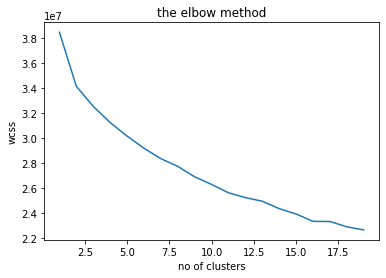

In [95]:
wcss_stemmed2 = [] #CHANGE
for i in range(1, 20): #max of 20 clusters otherwise might take too long
    kmeans_stem2 = KMeans(n_clusters = i, init='k-means++', max_iter = 300, n_init = 10, random_state = 0, verbose = True)
    kmeans_stem2.fit(X_stemmed2) #CHANGE
    wcss_stemmed2.append(kmeans_stem2.inertia_) #CHANGE
    
#Visualisation of inertia (how far away the points within a cluster are, want small inertia)
plt.plot(range(1,20),wcss_stemmed2[0:20]) #CHANGE
plt.title('the elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show

In [96]:
#applying K-means based on above elbow method, can change true_k to the desired number of clusters
true_k = 6
model_stem2 = KMeans(n_clusters=true_k, init='k-means++', n_init=1)
model_stem2.fit(X_stemmed2) #CHANGE

#Print results
print("top terms for cluster:")
order_centroids_stem2 = model_stem2.cluster_centers_.argsort()[:, ::-1]
terms_stem2 = cv_stem2.get_feature_names()
for i in range(true_k):
    print("cluster %d:" % i),
    for ind in order_centroids_stem2[i, :10]: #selects top terms
        print(' %s' % terms_stem2[ind]),
    print
    
print("\n")

top terms for cluster:
cluster 0:
 the
 includ
 compani
 product
 we
 us
 provid
 requir
 insur
 financi
cluster 1:
 entergi
 the
 energi
 power
 louisiana
 oper
 in
 util
 new
 system
cluster 2:
 we
 product
 includ
 the
 our
 oper
 compani
 servic
 provid
 custom
cluster 3:
 energi
 the
 electr
 generat
 oper
 gas
 2020
 util
 includ
 power
cluster 4:
 gas
 oper
 the
 natur
 energi
 2020
 electr
 includ
 generat
 regul
cluster 5:
 2020
 credit
 capit
 31
 decemb
 loan
 interest
 citi
 total
 card




In [97]:
#applying K-means based on above elbow method, can change true_k to the desired number of clusters
true_k = 15
model_stem2 = KMeans(n_clusters=true_k, init='k-means++', n_init=1)
model_stem2.fit(X_stemmed2) #CHANGE

#Print results
print("top terms for cluster:")
order_centroids_stem2 = model_stem2.cluster_centers_.argsort()[:, ::-1]
terms_stem2 = cv_stem2.get_feature_names()
for i in range(true_k):
    print("cluster %d:" % i),
    for ind in order_centroids_stem2[i, :10]: #selects top terms
        print(' %s' % terms_stem2[ind]),
    print
    
print("\n")

top terms for cluster:
cluster 0:
 compani
 the
 product
 includ
 2020
 oper
 busi
 market
 in
 provid
cluster 1:
 we
 includ
 the
 product
 oper
 our
 2020
 busi
 compani
 servic
cluster 2:
 product
 we
 includ
 our
 custom
 the
 provid
 market
 servic
 us
cluster 3:
 health
 care
 servic
 provid
 state
 includ
 we
 medicar
 medic
 regul
cluster 4:
 tax
 us
 incom
 reit
 properti
 care
 may
 health
 oper
 the
cluster 5:
 energi
 electr
 the
 gas
 oper
 generat
 power
 util
 2020
 includ
cluster 6:
 bank
 capit
 the
 financi
 requir
 includ
 2020
 feder
 risk
 credit
cluster 7:
 the
 oper
 includ
 we
 us
 2020
 manag
 in
 invest
 financi
cluster 8:
 insur
 compani
 the
 loss
 risk
 busi
 includ
 reinsur
 market
 claim
cluster 9:
 servic
 we
 includ
 provid
 custom
 data
 our
 market
 busi
 the
cluster 10:
 insur
 the
 compani
 product
 includ
 financi
 busi
 risk
 we
 regul
cluster 11:
 product
 the
 includ
 may
 we
 us
 in
 market
 fda
 develop
cluster 12:
 gas
 oper
 product
 the
 na

## Lemmatized

Initialization complete
Iteration 0, inertia 46179413.0.
Iteration 1, inertia 37646898.80120439.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 53964725.0.
Iteration 1, inertia 37646898.80120439.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 53993789.0.
Iteration 1, inertia 37646898.80120439.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 49171333.0.
Iteration 1, inertia 37646898.80120439.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 51589279.0.
Iteration 1, inertia 37646898.80120439.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 80931051.0.
Iteration 1, inertia 37646898.80120439.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 56828519.0.
Iteration 1, inertia 37646898.80120439.
Converged at iteration 1: strict convergence.

Iteration 0, inertia 52139721.0
Iteration 1, inertia 34482858.49580115
Iteration 2, inertia 34004071.48313934
Iteration 3, inertia 33236461.135733634
Iteration 4, inertia 32897485.001498356
Iteration 5, inertia 32799984.891166765
Iteration 6, inertia 32753892.459691554
Iteration 7, inertia 32750375.460791726
Iteration 8, inertia 32745032.313460656
Iteration 9, inertia 32738600.330967635
Iteration 10, inertia 32737323.79029507
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 44061629.0
Iteration 1, inertia 33443968.469467763
Iteration 2, inertia 33029526.09568777
Iteration 3, inertia 32903629.598565914
Iteration 4, inertia 32822318.8204138
Iteration 5, inertia 32746036.834686607
Iteration 6, inertia 32731076.90071587
Iteration 7, inertia 32723611.699190974
Iteration 8, inertia 32702669.862250704
Iteration 9, inertia 32691062.675428182
Iteration 10, inertia 32661517.890815154
Iteration 11, inertia 32659105.842160672
Converged at iteration 11: st

Initialization complete
Iteration 0, inertia 43200364.0
Iteration 1, inertia 30923506.751447428
Iteration 2, inertia 30422757.90952765
Iteration 3, inertia 30274691.133940686
Iteration 4, inertia 30179374.208096866
Iteration 5, inertia 30166324.437470466
Iteration 6, inertia 30155988.963227104
Iteration 7, inertia 30152170.50490664
Iteration 8, inertia 30150913.41774249
Iteration 9, inertia 30150583.88866234
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 43121059.0
Iteration 1, inertia 32450865.794882875
Iteration 2, inertia 31860889.763010375
Iteration 3, inertia 31548241.61981083
Iteration 4, inertia 31423735.624536227
Iteration 5, inertia 31375880.0329459
Iteration 6, inertia 31357041.22244662
Iteration 7, inertia 31355692.112444337
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 44158770.0
Iteration 1, inertia 31736388.974567775
Iteration 2, inertia 31135511.001438476
Iteration 3, inertia 3103655

Iteration 0, inertia 40416081.0
Iteration 1, inertia 31224854.33548128
Iteration 2, inertia 30979538.74333674
Iteration 3, inertia 30851186.1383087
Iteration 4, inertia 30704102.732767664
Iteration 5, inertia 30647731.727951024
Iteration 6, inertia 30574363.980669964
Iteration 7, inertia 30561569.500920214
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 41058243.0
Iteration 1, inertia 31418734.383653898
Iteration 2, inertia 30706928.922321178
Iteration 3, inertia 30315938.52172675
Iteration 4, inertia 29943843.235003754
Iteration 5, inertia 29604392.803321723
Iteration 6, inertia 29444367.145497523
Iteration 7, inertia 29348096.380631715
Iteration 8, inertia 29304086.295131132
Iteration 9, inertia 29291611.251217462
Iteration 10, inertia 29279713.783579074
Iteration 11, inertia 29277655.36781779
Iteration 12, inertia 29275722.32427699
Iteration 13, inertia 29274292.76656
Iteration 14, inertia 29273053.978426334
Iteration 15, inertia 29271630.8

Initialization complete
Iteration 0, inertia 40151654.0
Iteration 1, inertia 29838740.98017546
Iteration 2, inertia 29335981.88220847
Iteration 3, inertia 29130952.699823275
Iteration 4, inertia 28959399.73915522
Iteration 5, inertia 28775102.487021025
Iteration 6, inertia 28579913.12375235
Iteration 7, inertia 28463413.53807022
Iteration 8, inertia 28396791.04072147
Iteration 9, inertia 28374201.300331242
Iteration 10, inertia 28363408.83945592
Iteration 11, inertia 28362280.19546348
Iteration 12, inertia 28361367.949292127
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 38100961.0
Iteration 1, inertia 29259387.647231556
Iteration 2, inertia 28811329.196247693
Iteration 3, inertia 28696629.04175852
Iteration 4, inertia 28592174.56851703
Iteration 5, inertia 28483075.741058767
Iteration 6, inertia 28416193.577972393
Iteration 7, inertia 28381245.302950878
Iteration 8, inertia 28338232.654916953
Iteration 9, inertia 28317767.141437583
Iteratio

Initialization complete
Iteration 0, inertia 38396964.0
Iteration 1, inertia 28789054.75750894
Iteration 2, inertia 28376628.98084001
Iteration 3, inertia 28177192.100785464
Iteration 4, inertia 28095165.84576799
Iteration 5, inertia 28005296.76008722
Iteration 6, inertia 27944016.804291826
Iteration 7, inertia 27750271.07149756
Iteration 8, inertia 27626037.922864627
Iteration 9, inertia 27609218.169007298
Iteration 10, inertia 27603046.35068413
Iteration 11, inertia 27597567.002103474
Iteration 12, inertia 27595613.33195673
Iteration 13, inertia 27594916.18519746
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 36345076.0
Iteration 1, inertia 27300676.11228678
Iteration 2, inertia 26889589.74692983
Iteration 3, inertia 26802556.89834897
Iteration 4, inertia 26760054.657242045
Iteration 5, inertia 26745071.334305953
Iteration 6, inertia 26741325.57910867
Iteration 7, inertia 26739957.089545187
Converged at iteration 7: strict convergence.
Ini

Initialization complete
Iteration 0, inertia 37251361.0
Iteration 1, inertia 28635623.507024594
Iteration 2, inertia 27832908.847495798
Iteration 3, inertia 27459621.20098763
Iteration 4, inertia 27309265.912555292
Iteration 5, inertia 27261225.05086249
Iteration 6, inertia 27251229.747880574
Iteration 7, inertia 27242842.33946873
Iteration 8, inertia 27186289.813024774
Iteration 9, inertia 27151407.968777366
Iteration 10, inertia 27149277.539961923
Iteration 11, inertia 27148618.00670661
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 37323706.0
Iteration 1, inertia 28048166.01196381
Iteration 2, inertia 27595575.283724826
Iteration 3, inertia 27336257.526362024
Iteration 4, inertia 27246752.070860825
Iteration 5, inertia 27178756.050272122
Iteration 6, inertia 27154975.24352965
Iteration 7, inertia 27141356.627029125
Iteration 8, inertia 27137112.700276934
Iteration 9, inertia 27135934.60903024
Iteration 10, inertia 27135380.51511476
Conver

Initialization complete
Iteration 0, inertia 36184923.0
Iteration 1, inertia 25908490.438917115
Iteration 2, inertia 25561243.871983062
Iteration 3, inertia 25512806.313200206
Iteration 4, inertia 25508382.649284378
Iteration 5, inertia 25507966.534769747
Iteration 6, inertia 25507110.413424186
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 36403280.0
Iteration 1, inertia 26841300.638986744
Iteration 2, inertia 26033821.496192195
Iteration 3, inertia 25717835.282772258
Iteration 4, inertia 25464493.108259372
Iteration 5, inertia 25161988.75060035
Iteration 6, inertia 25149611.608762525
Iteration 7, inertia 25139711.86630611
Iteration 8, inertia 25116755.89940608
Iteration 9, inertia 25089549.1738972
Iteration 10, inertia 25074833.5179169
Iteration 11, inertia 25050273.755310766
Iteration 12, inertia 25021911.884448845
Iteration 13, inertia 24997996.593917895
Iteration 14, inertia 24979890.846173797
Iteration 15, inertia 24974187.642879043
Ite

Iteration 17, inertia 25363907.65552181
Iteration 18, inertia 25337678.344932884
Iteration 19, inertia 25331366.94262723
Converged at iteration 19: strict convergence.
Initialization complete
Iteration 0, inertia 35013191.0
Iteration 1, inertia 25953680.833164714
Iteration 2, inertia 25669309.445771538
Iteration 3, inertia 25556813.198638022
Iteration 4, inertia 25430377.843224984
Iteration 5, inertia 25352051.15223159
Iteration 6, inertia 25254127.678603277
Iteration 7, inertia 25198266.837748595
Iteration 8, inertia 25187614.255438227
Iteration 9, inertia 25179621.717208598
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 35828015.0
Iteration 1, inertia 26306295.396346506
Iteration 2, inertia 25990788.543848228
Iteration 3, inertia 25904885.83902209
Iteration 4, inertia 25875585.47637225
Iteration 5, inertia 25843917.28450583
Iteration 6, inertia 25797988.718275987
Iteration 7, inertia 25729282.8334666
Iteration 8, inertia 25642443.515682824


Iteration 13, inertia 24637245.84657253
Iteration 14, inertia 24633457.01073907
Iteration 15, inertia 24632284.37209174
Converged at iteration 15: strict convergence.
Initialization complete
Iteration 0, inertia 35397889.0
Iteration 1, inertia 25244119.562084865
Iteration 2, inertia 24609957.15525212
Iteration 3, inertia 24471354.165465638
Iteration 4, inertia 24382176.016334973
Iteration 5, inertia 24359690.06708062
Iteration 6, inertia 24354213.723411933
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 34681675.0
Iteration 1, inertia 24303918.23638973
Iteration 2, inertia 24077771.260301135
Iteration 3, inertia 24028453.475297686
Iteration 4, inertia 23986463.913629033
Iteration 5, inertia 23983695.736009978
Iteration 6, inertia 23979977.236669444
Iteration 7, inertia 23978278.24603624
Iteration 8, inertia 23973800.340171855
Iteration 9, inertia 23972447.62022922
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 

Initialization complete
Iteration 0, inertia 34595368.0
Iteration 1, inertia 25328089.354219615
Iteration 2, inertia 24674279.626712546
Iteration 3, inertia 24252187.54063911
Iteration 4, inertia 24097526.759386912
Iteration 5, inertia 24001170.142190687
Iteration 6, inertia 23873521.264775395
Iteration 7, inertia 23792083.983635746
Iteration 8, inertia 23777963.134189222
Iteration 9, inertia 23773926.69929154
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 35330349.0
Iteration 1, inertia 24330368.80120532
Iteration 2, inertia 23937063.007659737
Iteration 3, inertia 23841213.99718495
Iteration 4, inertia 23808007.860298086
Iteration 5, inertia 23783776.40094976
Iteration 6, inertia 23763837.617441025
Iteration 7, inertia 23748701.906959824
Iteration 8, inertia 23746593.2930434
Iteration 9, inertia 23739926.157011077
Iteration 10, inertia 23725280.25350894
Iteration 11, inertia 23716646.213776562
Iteration 12, inertia 23710980.695981435
Iterati

Initialization complete
Iteration 0, inertia 33559321.0
Iteration 1, inertia 25088462.886806108
Iteration 2, inertia 24623410.89698814
Iteration 3, inertia 24521236.617118936
Iteration 4, inertia 24459449.121652886
Iteration 5, inertia 24418412.55756853
Iteration 6, inertia 24399523.55862231
Iteration 7, inertia 24375412.942681145
Iteration 8, inertia 24356890.43467452
Iteration 9, inertia 24349991.98240586
Iteration 10, inertia 24348467.788785353
Iteration 11, inertia 24345114.75991011
Iteration 12, inertia 24338006.760143526
Iteration 13, inertia 24323193.39194866
Iteration 14, inertia 24298937.416163653
Iteration 15, inertia 24289778.932449162
Iteration 16, inertia 24287979.393799227
Iteration 17, inertia 24286463.621823806
Converged at iteration 17: strict convergence.
Initialization complete
Iteration 0, inertia 33625055.0
Iteration 1, inertia 24695214.221527655
Iteration 2, inertia 24405393.85216435
Iteration 3, inertia 24285423.870275468
Iteration 4, inertia 24239113.08532118
It

<function matplotlib.pyplot.show(close=None, block=None)>

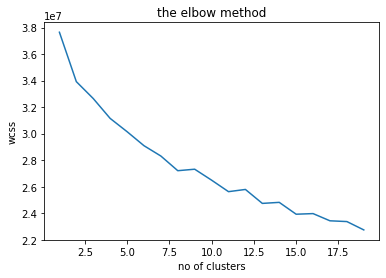

In [98]:
wcss_lemmad = [] #CHANGE
for i in range(1, 20): #max of 20 clusters otherwise might take too long
    kmeans_lem = KMeans(n_clusters = i, init='k-means++', max_iter = 300, n_init = 10, random_state = 0, verbose = True)
    kmeans_lem.fit(X_lemmad) #CHANGE
    wcss_lemmad.append(kmeans_lem.inertia_) #CHANGE
    
#Visualisation of inertia (how far away the points within a cluster are, want small inertia)
plt.plot(range(1,20),wcss_lemmad[0:20]) #CHANGE
plt.title('the elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show

In [99]:
#applying K-means based on above elbow method, can change true_k to the desired number of clusters
true_k = 10
model_lem = KMeans(n_clusters=true_k, init='k-means++', n_init=1)
model_lem.fit(X_lemmad) #CHANGE

#Print results
print("top terms for cluster:")
order_centroids_lem = model_lem.cluster_centers_.argsort()[:, ::-1]
terms_lem = cv_lem.get_feature_names()
for i in range(true_k):
    print("cluster %d:" % i),
    for ind in order_centroids_lem[i, :10]: #selects top terms
        print(' %s' % terms_lem[ind]),
    print
    
print("\n")

top terms for cluster:
cluster 0:
 energy
 monster
 product
 we
 drink
 line
 drinks
 certain
 beverage
 may
cluster 1:
 gas
 the
 natural
 energy
 2020
 electric
 in
 service
 power
 company
cluster 2:
 company
 insurance
 the
 business
 loss
 risk
 reinsurance
 including
 market
 property
cluster 3:
 product
 we
 the
 health
 may
 in
 care
 including
 service
 business
cluster 4:
 we
 product
 the
 company
 business
 our
 2020
 in
 including
 customer
cluster 5:
 we
 service
 our
 business
 customer
 product
 the
 data
 including
 in
cluster 6:
 company
 the
 health
 2020
 business
 in
 service
 including
 also
 state
cluster 7:
 energy
 the
 entergy
 power
 2020
 gas
 in
 electric
 cost
 utility
cluster 8:
 capital
 the
 bank
 financial
 risk
 2020
 federal
 company
 banking
 including
cluster 9:
 the
 we
 company
 business
 2020
 product
 in
 including
 our
 insurance




## Looking at the clustering (using stemmed and removed punctuation)

In [100]:
clusters_stem2 = model_stem2.labels_.tolist()

In [101]:
companies = {'tickers':company_ids, 'descriptions':company_descriptions, 'clusters_stem2': clusters_stem2}
frame = pd.DataFrame(companies, index = [clusters_stem2])
frame.head(10)

,tickers,descriptions,clusters_stem2
7,AAL,"Overview\nAmerican Airlines Group Inc. (AAG), ...",7
1,AAPL,"Company Background\nThe Company designs, manuf...",1
1,AAP,"Unless the context otherwise requires, “Advanc...",1
11,ABBV,"Overview\nAbbVie(1) is a global, research-base...",11
1,ABC,"As used herein, the terms ""Company,"" ""Amerisou...",1
11,ABMD,Corporate Background\n\nOur Company was founde...,11
1,ABT,GENERAL DEVELOPMENT OF BUSINESS\n\nAbbott Labo...,1
1,ACN,Overview \nAccenture is a leading global profe...,1
9,ADBE,"Founded in 1982, Adobe Inc. is one of the larg...",9
2,ADI,"Company Overview, Strategy and Mission\nAnalog...",2


In [102]:
frame['clusters_stem2'].value_counts()

1     179
2     130
0      33
7      32
9      26
6      20
11     19
10     15
12     15
5      14
14      6
3       4
13      3
4       1
8       1
Name: clusters_stem2, dtype: int64

In [103]:
frame.loc[frame['clusters_stem2'] == 5]

,tickers,descriptions,clusters_stem2
5,AEP,GENERAL\n\n\nOverview and Description of Major...,5
5,AES,Item 1.—Business is an outline of our strategy...,5
5,CNP,\nThis combined Form 10-K is filed separately ...,5
5,DUK,General\nDuke Energy was incorporated on May 3...,5
5,D,"GENERAL\n\nDominion Energy, headquartered in R...",5
5,ED,"Overview\nConsolidated Edison, Inc. (Con Ediso...",5
5,ES,Please refer to the Glossary of Terms for defi...,5
5,ETR,Entergy is an integrated energy company engage...,5
5,EXC,Corporate Structure and Business and Other Inf...,5
5,PEG,We were incorporated under the laws of the Sta...,5


## Testing Hierarchical Clustering

In [104]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward, dendrogram

In [105]:
dist = 1 - cosine_similarity(X_stemmed2)

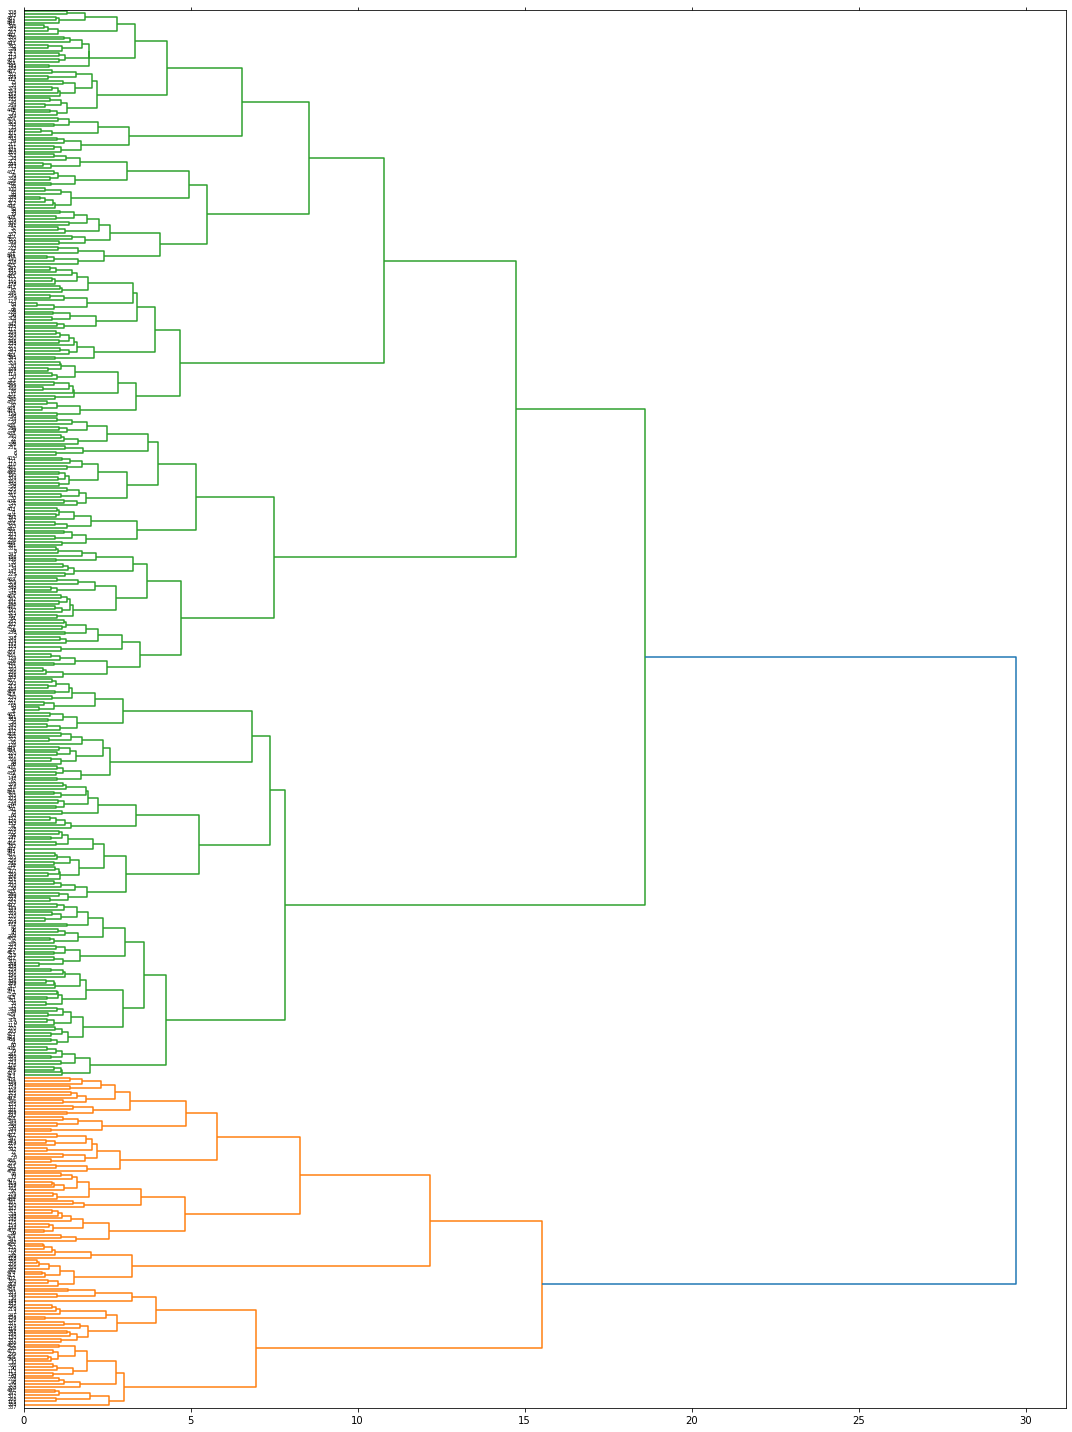

In [106]:
linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right");  #, labels=titles);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
# plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

# LDA 

In [107]:
n_features = 1000
n_components = 10
n_top_words = 20

In [108]:
tf_vec_raw = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
tf_raw = tf_vec_raw.fit_transform(company_descriptions)

tf_vec_stem = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
tf_stem = tf_vec_stem.fit_transform(stemmed_text)

tf_vec_stem2 = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
tf_stem2 = tf_vec_stem2.fit_transform(stemmed_text2)

tf_vec_lem = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
tf_lem = tf_vec_lem.fit_transform(lemmad_text)

In [109]:
print(tf_raw.shape)
print(tf_stem.shape)
print(tf_stem2.shape)
print(tf_lem.shape)

(498, 1000)
(498, 1000)
(498, 1000)
(498, 1000)


## Raw

In [110]:
lda_raw = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda_raw.fit(tf_raw)
lda_raw.perplexity(tf_raw)

619.590134459762

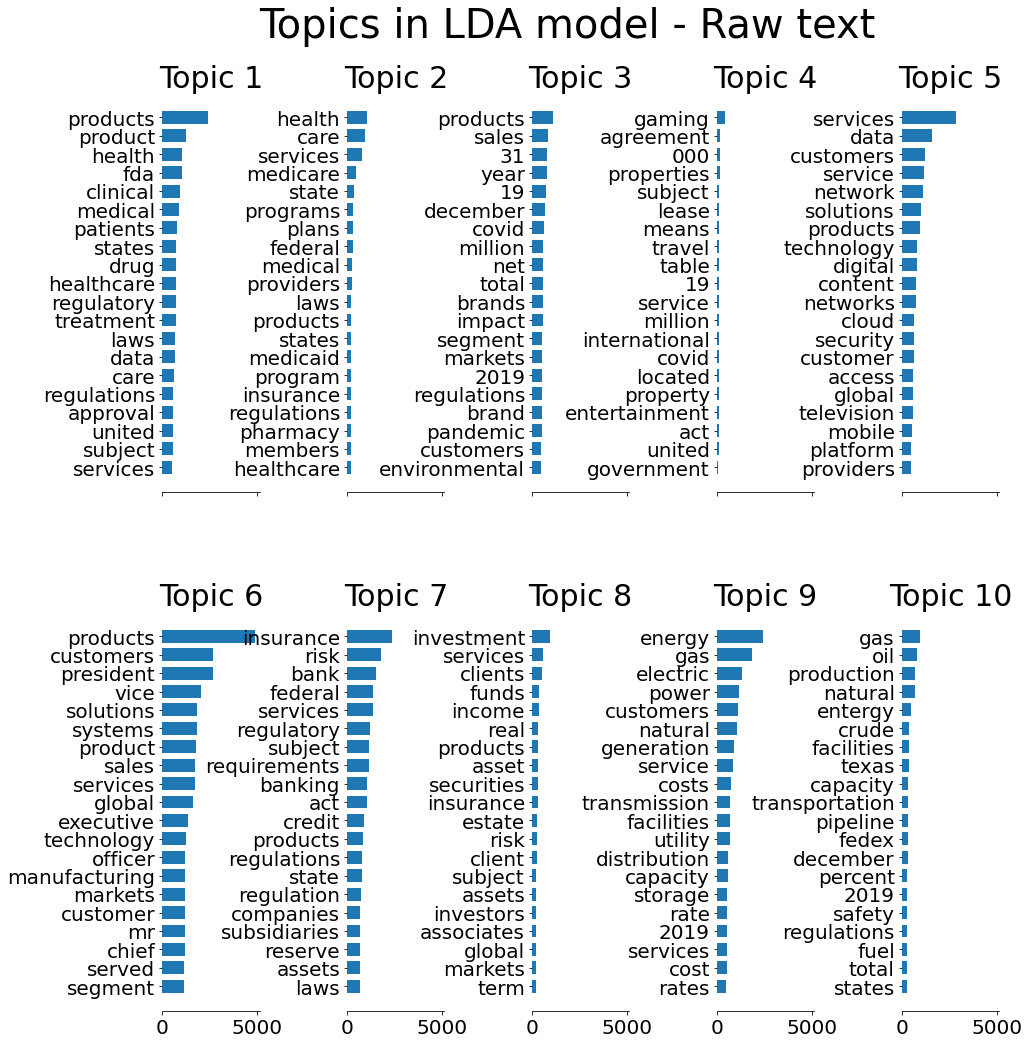

In [111]:
# names of words 
tf_feature_names_raw = tf_vec_raw.get_feature_names()
plot_top_words(lda_raw, tf_feature_names_raw, n_top_words, 'Topics in LDA model - Raw text')

## Stemmed

In [112]:
lda_stem = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda_stem.fit(tf_stem)
lda_stem.perplexity(tf_stem)

630.9814866788059

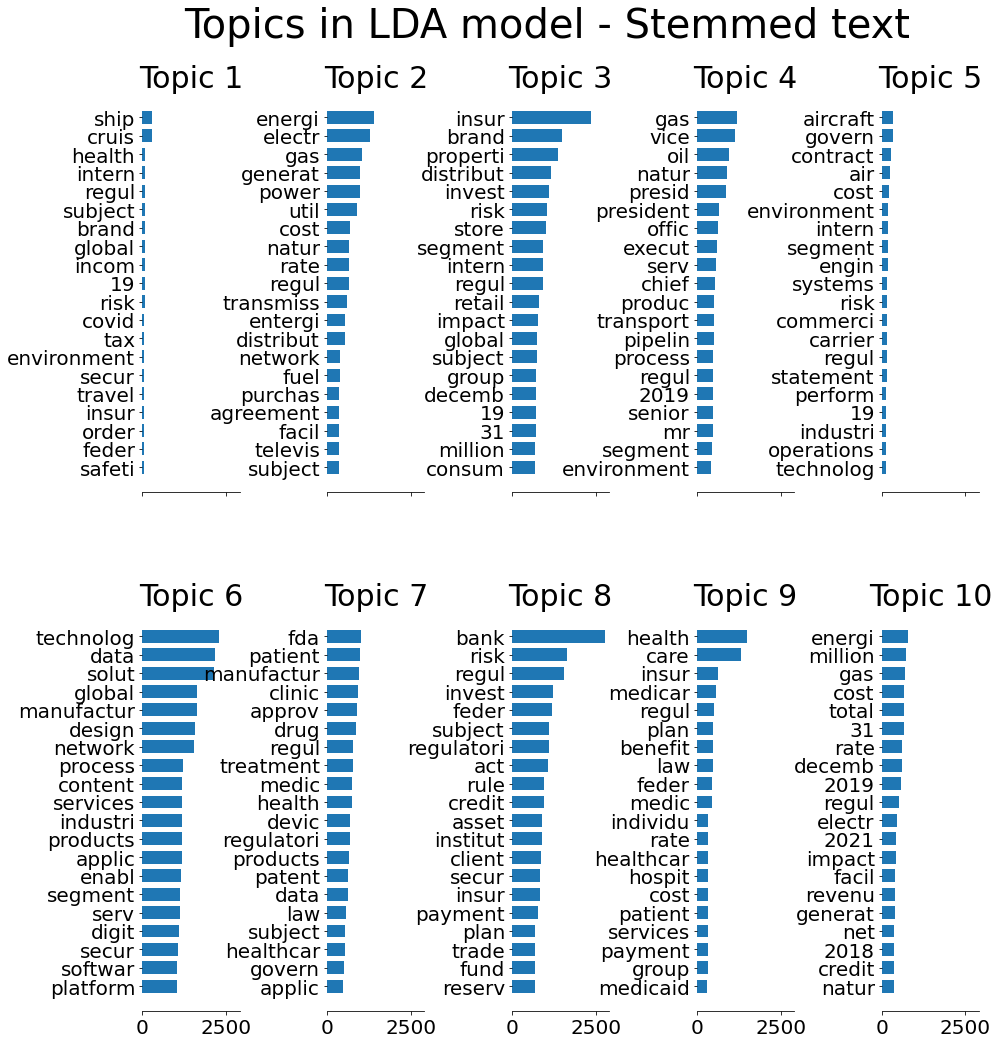

In [113]:
# names of words 
tf_feature_names_stem = tf_vec_stem.get_feature_names()
plot_top_words(lda_stem, tf_feature_names_stem, n_top_words, 'Topics in LDA model - Stemmed text')

## Stemmed and removed punctuation

In [114]:
lda_stem2 = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda_stem2.fit(tf_stem2)
lda_stem2.perplexity(tf_stem2)

626.0148644834472

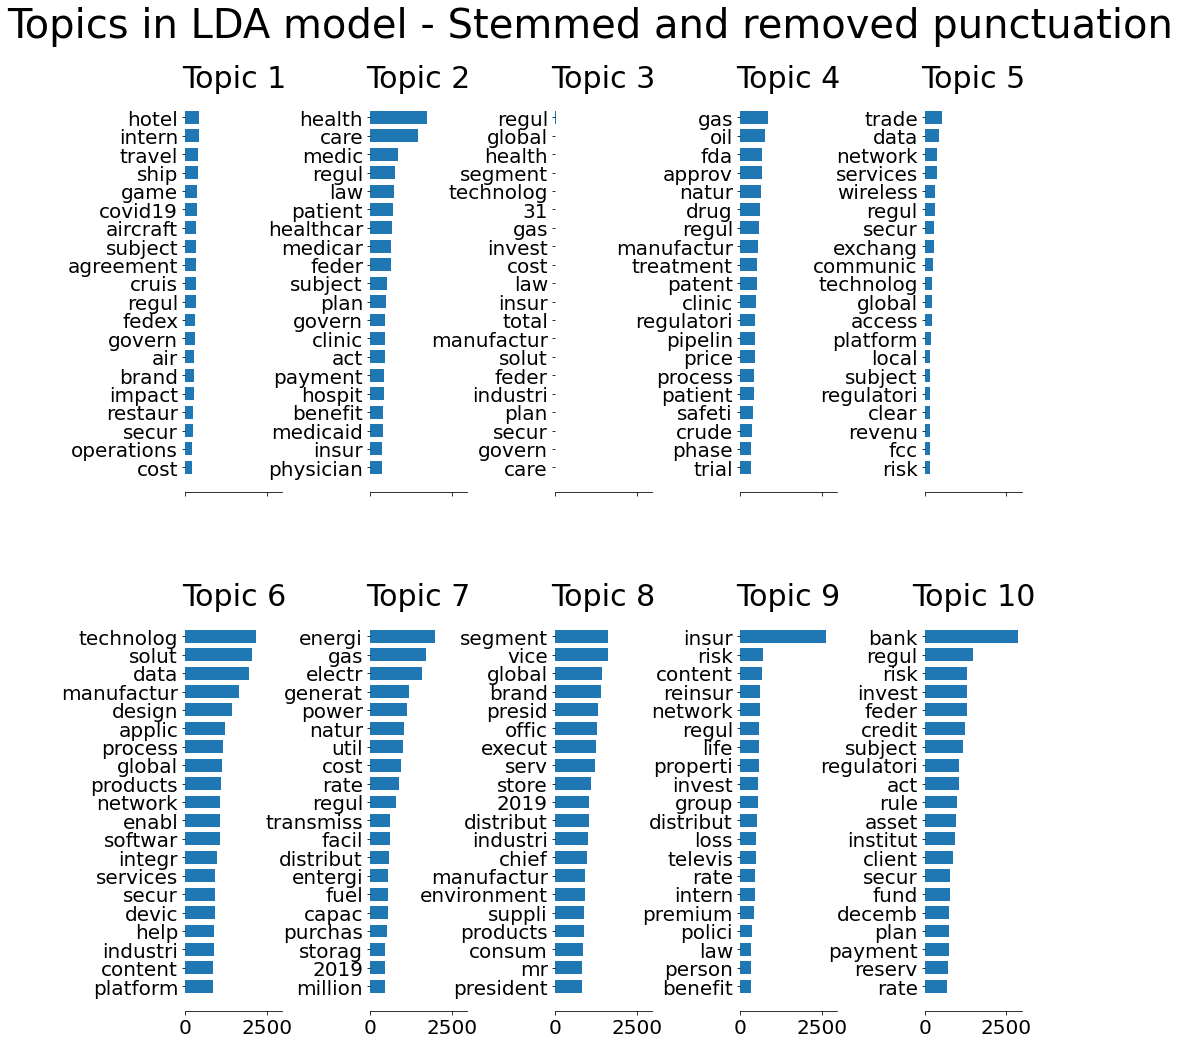

In [115]:
# names of words 
tf_feature_names_stem2 = tf_vec_stem2.get_feature_names()
plot_top_words(lda_stem2, tf_feature_names_stem2, n_top_words, 'Topics in LDA model - Stemmed and removed punctuation')

## Lemmatised

In [116]:
lda_lem = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda_lem.fit(tf_lem)
lda_lem.perplexity(tf_lem)

612.3039797731466

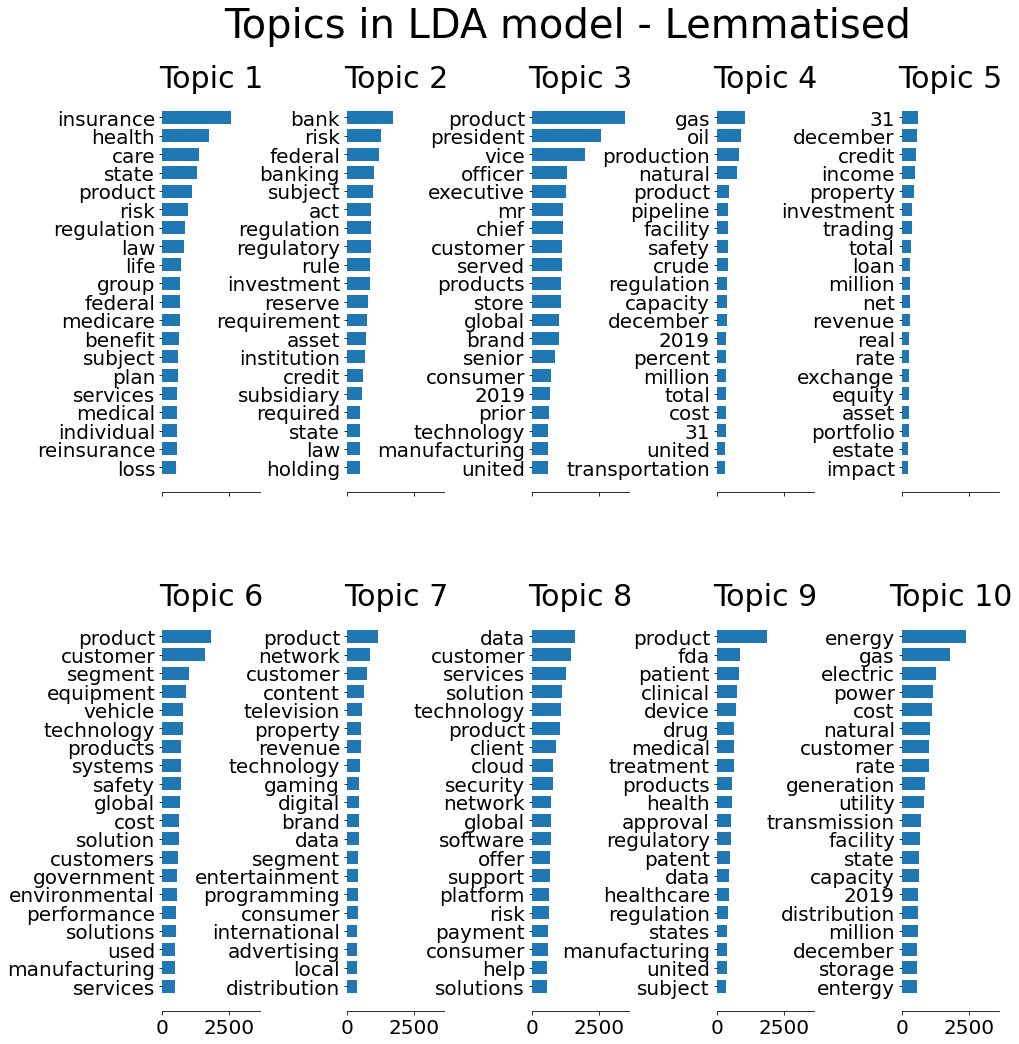

In [117]:
# names of words 
tf_feature_names_lem = tf_vec_lem.get_feature_names()
plot_top_words(lda_lem, tf_feature_names_lem, n_top_words, 'Topics in LDA model - Lemmatised')